# Final Research Project - League of Legends All Tourments Season 13 Spring/Summer

### Preparation - Notebook Prep

December 14, 2023

For this analysis, we have sourced data from official tournament records and player statistics provided by Riot Games, the developer of League of Legends. The dataset encompasses detailed information about each champion's performance during all the tournaments throughout the world for season 13 in 2023. Additional champion data can be found at https://gol.gg/champion/list/season-S13/split-ALL/tournament-Worlds%20Main%20Event%202023/, which provides further context and statistics on champion usage in the tournament.

In this project, we will be using tables and graphs based on the the tournaments through out season 13 of League. We will clean and visualize the data. From that information we will be able to make analysis. We decided to use this data set, as it provides a lot of data and it can be manipulated. 

In [38]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [39]:
#Find file path
find_path_spring = os.path.abspath('tournaments_s13_spring_data.csv')
find_path_summer = os.path.abspath('tournaments_s13_summer_data.csv')

#Create variable for path
path_spring = 'tournaments_s13_spring_data.csv'
path_summer = 'tournaments_s13_summer_data.csv'

#Read the csv and put it into it's own variable
tournaments_spring_raw = pd.read_excel(path_spring)
tournaments_summer_raw = pd.read_excel(path_summer)

#Show info
tournaments_spring_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165 entries, 0 to 164
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Champion  165 non-null    object        
 1   Picks     165 non-null    int64         
 2   Bans      165 non-null    int64         
 3   Presence  165 non-null    float64       
 4   Wins      158 non-null    float64       
 5   Losses    158 non-null    float64       
 6   Winrate   158 non-null    float64       
 7   KDA       158 non-null    float64       
 8   Avg BT    165 non-null    object        
 9   GT        158 non-null    datetime64[ns]
 10  CSM       158 non-null    float64       
 11  DPM       158 non-null    float64       
 12  GPM       158 non-null    float64       
 13  CSD@15    158 non-null    object        
 14  GD@15     158 non-null    object        
 15  XPD@15    158 non-null    object        
dtypes: datetime64[ns](1), float64(8), int64(2), object(5)
memory u

Explanation of the columns
Avg BT: for average Ban Time. In League before the match starts, each team is aloud to ban 5 champions. It is a scale from 1 to 10. 1 meaning it was a first ban, and 10 meaning it was the last ban for the two teams. 
GT: Game Time
CSM: Creep Score Per Minute -- How many minions killed per minute -- the higher the better
DPM: Damage to Champions per Minute
GPM: Gold per Minute -- Gold is obtained through minions, objectives, and kills
CSD@15: Creep Score Differential at 15 minutes -- Compares your creep score to your opponent at 15 minutes
XPD@15: Experience Differential at 15 minutes -- Compares your level and experience to your opponent at 15 minutes

In [40]:
tournaments_spring_raw.head()

,Champion,Picks,Bans,Presence,Wins,Losses,Winrate,KDA,Avg BT,GT,CSM,DPM,GPM,CSD@15,GD@15,XPD@15
0,Sejuani,1419,1450,0.71,694.0,725.0,0.49,3.7,3.9,1900-01-01 08:22:00,5.1,293.0,319.0,-2.9,-72,-67
1,Maokai,950,1597,0.63,567.0,383.0,0.60,3.4,4,1900-01-01 08:09:00,5.0,517.0,332.0,-1.5,-106,-114
2,Varus,1241,1300,0.63,610.0,631.0,0.49,3.5,4.2,1900-01-01 08:29:00,8.5,612.0,414.0,2.8,78,32
3,Ashe,568,1887,0.61,299.0,269.0,0.53,3.7,3.8,1900-01-01 08:21:00,2.3,382.0,280.0,-7.2,-3,-18
4,Vi,1285,1127,0.60,693.0,592.0,0.54,2.8,4.8,1900-01-01 07:53:00,5.2,256.0,330.0,0.7,-85,55


In [41]:
tournaments_summer_raw.head()

,Champion,Picks,Bans,Presence,Wins,Losses,Winrate,KDA,Avg BT,GT,CSM,DPM,GPM,CSD@15,GD@15,XPD@15
0,Maokai,1266,1657,0.74,706.0,560.0,0.56,3.6,4.2,1900-01-01 07:13:00,4.9,434.0,329.0,-4.5,-216.0,-211.0
1,Xayah,1512,1044,0.65,800.0,712.0,0.53,4.1,5.5,1900-01-01 07:24:00,9.8,617.0,452.0,0.7,79.0,72.0
2,Neeko,614,1903,0.64,331.0,283.0,0.54,3.4,3.7,1900-01-01 06:58:00,7.6,541.0,376.0,2.2,51.0,58.0
3,LeBlanc,590,1917,0.64,299.0,291.0,0.51,4.4,4.1,1900-01-01 07:13:00,9.5,705.0,442.0,9.8,385.0,362.0
4,Sejuani,1331,1158,0.63,648.0,683.0,0.49,3.8,4.8,1900-01-01 07:11:00,5.2,292.0,327.0,-0.5,-13.0,-34.0


### Combining the Data

In [42]:
#Adding a new column to both dataframes to determine which table the data is coming from
tournaments_spring_raw['Spring'] = 'Spring'
tournaments_summer_raw['Summer'] = 'Summer'

#Combine both dataframes and get rid of duplicates
data = pd.concat([tournaments_spring_raw, tournaments_summer_raw]).drop_duplicates()

In [43]:
#Drop unwanted columns
column_to_drop = 'GT'
data = data.drop(column_to_drop, axis = 1)


In [44]:
#Call head() and tail() to get an idea of the dataset attributes and values
data.head(4)

,Champion,Picks,Bans,Presence,Wins,Losses,Winrate,KDA,Avg BT,CSM,DPM,GPM,CSD@15,GD@15,XPD@15,Spring,Summer
0,Sejuani,1419,1450,0.71,694.0,725.0,0.49,3.7,3.9,5.1,293.0,319.0,-2.9,-72,-67,Spring,NaN
1,Maokai,950,1597,0.63,567.0,383.0,0.60,3.4,4,5.0,517.0,332.0,-1.5,-106,-114,Spring,NaN
2,Varus,1241,1300,0.63,610.0,631.0,0.49,3.5,4.2,8.5,612.0,414.0,2.8,78,32,Spring,NaN
3,Ashe,568,1887,0.61,299.0,269.0,0.53,3.7,3.8,2.3,382.0,280.0,-7.2,-3,-18,Spring,NaN


In [45]:
data.tail(4)

,Champion,Picks,Bans,Presence,Wins,Losses,Winrate,KDA,Avg BT,CSM,DPM,GPM,CSD@15,GD@15,XPD@15,Spring,Summer
161,Rammus,0,0,0.0,NaN,NaN,NaN,NaN,-,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Summer
162,Shen,0,0,0.0,NaN,NaN,NaN,NaN,-,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Summer
163,Teemo,0,0,0.0,NaN,NaN,NaN,NaN,-,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Summer
164,Briar,0,0,0.0,NaN,NaN,NaN,NaN,-,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Summer


### Data Cleaning

In [57]:
data.dtypes

Champion     object
Picks         int64
Bans          int64
Presence    float64
Wins        float64
Losses      float64
Winrate     float64
KDA         float64
Avg BT       object
CSM         float64
DPM         float64
GPM         float64
CSD@15       object
GD@15        object
XPD@15       object
Spring       object
Summer       object
dtype: object

The reason why I converted these data types was because most of the columns were already in suitable types for analysis. However, a few columns with the data type 'object' indicated they might contain non-numeric or string data. To enable numerical analysis and visualization, I converted these columns to the appropriate data types, such as float for numeric values or datetime for date/time values. The code snippet below shows how I performed the conversion:

In [58]:
data['Avg BT'] = pd.to_numeric(data['Avg BT'], errors='coerce')
data['CSD@15'] = pd.to_numeric(data['CSD@15'], errors='coerce')
data['GD@15'] = pd.to_numeric(data['GD@15'], errors='coerce')
data['XPD@15'] = pd.to_numeric(data['XPD@15'], errors='coerce')
# data['Spring'] = pd.to_datetime(data['Spring'], errors='coerce')
# data['Summer'] = pd.to_datetime(data['Summer'], errors='coerce')

data.dtypes

Champion     object
Picks         int64
Bans          int64
Presence    float64
Wins        float64
Losses      float64
Winrate     float64
KDA         float64
Avg BT      float64
CSM         float64
DPM         float64
GPM         float64
CSD@15      float64
GD@15       float64
XPD@15      float64
Spring       object
Summer       object
dtype: object

By using errors='coerce', I ensured that non-convertible values were transformed into NaN, which is useful for handling missing or invalid data during the conversion process.

In [59]:
#Checking for Null values in the dataset
data.isnull().sum()

Champion      0
Picks         0
Bans          0
Presence      0
Wins         11
Losses       11
Winrate      11
KDA          11
Avg BT       31
CSM          11
DPM          11
GPM          11
CSD@15       12
GD@15        12
XPD@15       12
Spring      165
Summer      165
dtype: int64

Treating Null Values

In [60]:
#Taking care NaN values in the dataset
data.tail()

,Champion,Picks,Bans,Presence,Wins,Losses,Winrate,KDA,Avg BT,CSM,DPM,GPM,CSD@15,GD@15,XPD@15,Spring,Summer
160,Yorick,1,0,0.0,0.0,1.0,0.0,1.0,NaN,9.2,797.0,427.0,16.0,272.0,135.0,NaN,Summer
161,Rammus,0,0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Summer
162,Shen,0,0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Summer
163,Teemo,0,0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Summer
164,Briar,0,0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Summer


In [61]:
#Replacing null values with 0
data['XPD@15'] = data['XPD@15'].fillna(0)
data['GD@15'] = data['GD@15'].fillna(0)
data['CSD@15'] = data['CSD@15'].fillna(0)
data['GPM'] = data['GPM'].fillna(0)
data['DPM'] = data['DPM'].fillna(0)
data['CSM'] = data['CSM'].fillna(0)
data['Avg BT'] = data['Avg BT'].fillna(0)
data['KDA'] = data['KDA'].fillna(0)
data['Losses'] = data['Losses'].fillna(0)
data['Wins'] = data['Wins'].fillna(0)
data['Winrate'] = data['Winrate'].fillna(0)

In [62]:
#Replacing null values from Spring and Summer
data['Spring'] = data['Spring'].fillna('Spring')
data['Summer'] = data['Summer'].fillna('Summer')

In [63]:
data.tail()

,Champion,Picks,Bans,Presence,Wins,Losses,Winrate,KDA,Avg BT,CSM,DPM,GPM,CSD@15,GD@15,XPD@15,Spring,Summer
160,Yorick,1,0,0.0,0.0,1.0,0.0,1.0,0.0,9.2,797.0,427.0,16.0,272.0,135.0,Spring,Summer
161,Rammus,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Spring,Summer
162,Shen,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Spring,Summer
163,Teemo,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Spring,Summer
164,Briar,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Spring,Summer


In [64]:
# Checking if any more null values exist
data.isnull().sum()

Champion    0
Picks       0
Bans        0
Presence    0
Wins        0
Losses      0
Winrate     0
KDA         0
Avg BT      0
CSM         0
DPM         0
GPM         0
CSD@15      0
GD@15       0
XPD@15      0
Spring      0
Summer      0
dtype: int64

### Data Analysis

Now that we've examined the dataset's structure, data types, as well as reviewed the first and last rows, we're ready to commence our analysis!

First, I want to examine the performance statistics of League of Legends champions in the dataset. This includes important metrics such as wins, losses, kill-death-assist ratio (KDA), and win rate.

In [46]:
# Pivoting data to get total wins and losses for each champion
champion_stats = data.pivot_table(index="Champion", values=["Wins", "Losses", "Winrate", "KDA"])

champion_stats.head()

,KDA,Losses,Winrate,Wins
Champion,,,,
Aatrox,2.40,107.5,0.480,94.0
Ahri,4.70,380.5,0.490,366.0
Akali,3.10,171.5,0.455,146.5
Akshan,3.15,5.0,0.525,6.5
Alistar,2.80,218.0,0.480,208.0


Win-Loss Analysis

Let's start by examining the top-performing League of Legends champions based on their total number of wins. This bar chart showcases the top 10 champions with the most victories in competitive play. Each bar corresponds to a champion, and its height represents the number of wins they've achieved. This data highlights which champions have excelled in competitive matches.

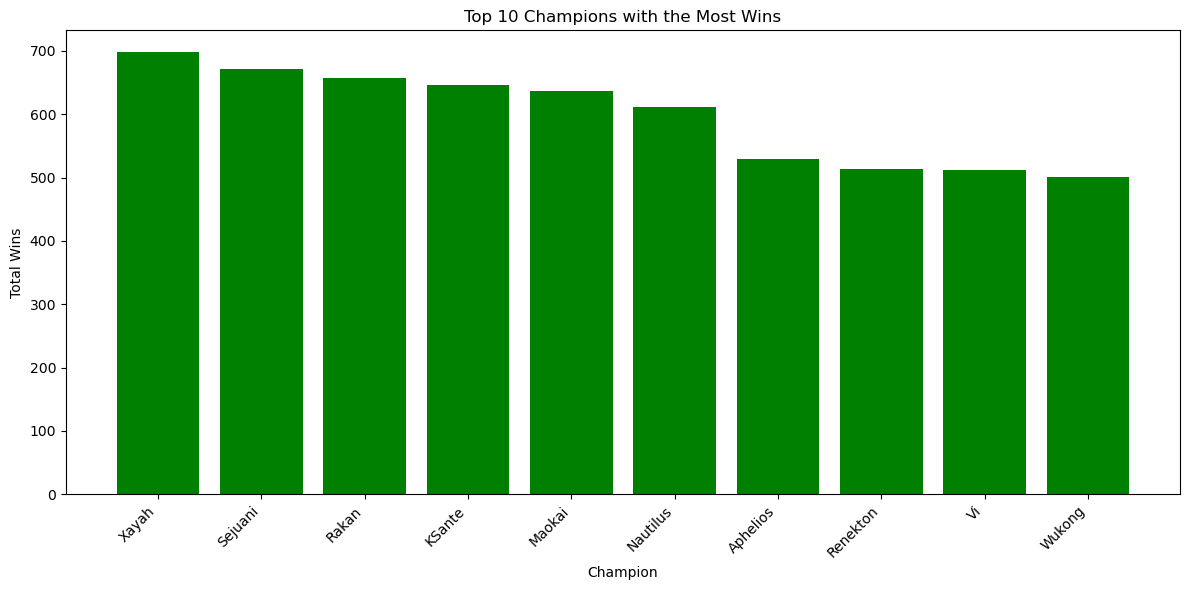

In [47]:
import matplotlib.pyplot as plt

top_winning_champions = champion_stats.sort_values(by='Wins', ascending=False).head(10)

plt.figure(figsize=(12, 6))
plt.bar(top_winning_champions.index, top_winning_champions['Wins'], color='green')
plt.xlabel('Champion')
plt.ylabel('Total Wins')
plt.title('Top 10 Champions with the Most Wins')
plt.xticks(rotation=45, ha='right') 

plt.tight_layout()
plt.show()

Xayah and Rakan being ranked 1st and 3rd is likely due to these two champions are typically played in unison. They have unique passives that are improved with these two champions are played together. Sejuani being high up the list can be contributed by providing the team with the necessary utility and tankiness for the team to win. 

Now, let's shift our focus to the champions that have encountered the most losses in competitive League of Legends matches. This bar chart displays the top 10 champions with the highest number of losses. Each bar corresponds to a champion, and its height represents the total losses they've experienced. This data sheds light on which champions have faced tough challenges and may provide insights into their performance trends.

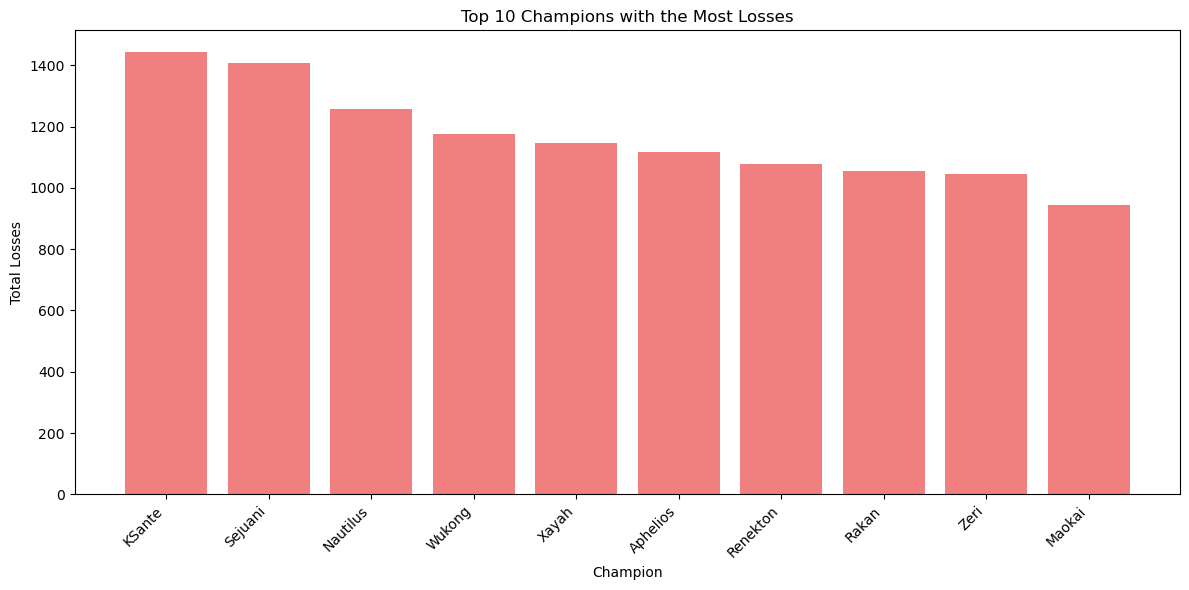

In [48]:
import matplotlib.pyplot as plt

top_losing_champions = data.groupby('Champion')['Losses'].sum().nlargest(10)
top_losing_champions = top_losing_champions.reset_index()

plt.figure(figsize=(12, 6))
plt.bar(top_losing_champions['Champion'], top_losing_champions['Losses'], color='lightcoral')
plt.xlabel('Champion')
plt.ylabel('Total Losses')
plt.title('Top 10 Champions with the Most Losses')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

We can see that many of the same champions that were on the list for the most wins, are also on the list for most losses. How can this be? This is a result of these champions having a significantly higher pick rate compared to the other champions. This will result on higher total wins and losses for these champions. 

After showcasing the top 10 champions with the highest number of wins and losses, we can now delve into a compelling comparison of their win-loss ratios. This analysis provides us with valuable insights into how these champions perform in competitive League of Legends matches. By examining their win-loss ratios side by side, we can gain a deeper understanding of their overall effectiveness and competitive prowess. Join us as we explore the champions that strike the perfect balance between victories and defeats, and those who may have room for improvement in their performance.

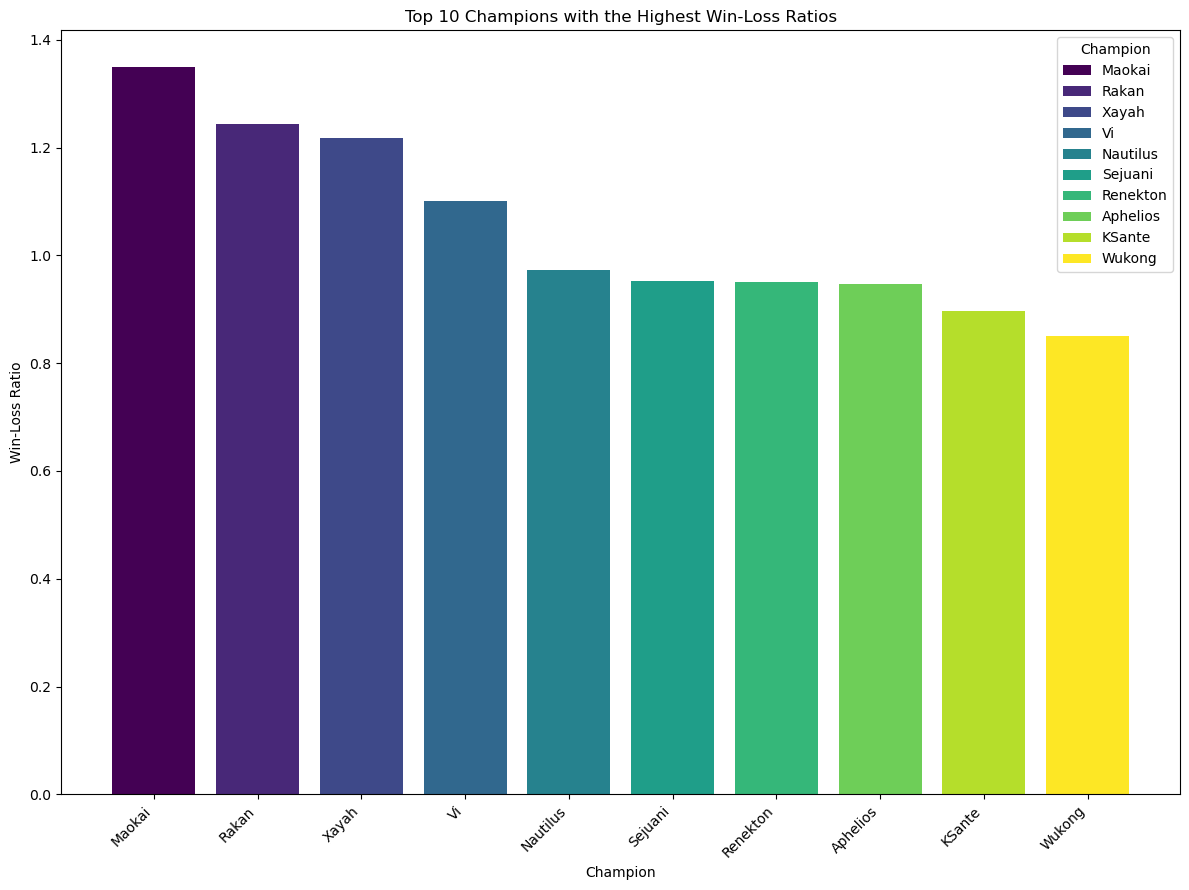

In [52]:
import matplotlib.pyplot as plt
import numpy as np  

top_winning_champions = champion_stats.sort_values(by='Wins', ascending=False).head(10)

top_winning_champions['Win-Loss Ratio'] = top_winning_champions['Wins'] / top_winning_champions['Losses']

top_winning_champions = top_winning_champions.sort_values(by='Win-Loss Ratio', ascending=False)

colors = plt.cm.viridis(np.linspace(0, 1, len(top_winning_champions)))

plt.figure(figsize=(12, 9))
bars = plt.bar(top_winning_champions.index, top_winning_champions['Win-Loss Ratio'], color=colors)
plt.xlabel('Champion')
plt.ylabel('Win-Loss Ratio')
plt.title('Top 10 Champions with the Highest Win-Loss Ratios')
plt.xticks(rotation=45, ha='right')

legend_labels = top_winning_champions.index
plt.legend(bars, legend_labels, loc='upper right', title='Champion')

plt.tight_layout()
plt.show()

Common theme of the same few champions being on the list for highest W/L ratio. These champions provide excellent utility to the team, and also work very well with one another. A reason for these champions being dominant can also be contributed by the meta -- what people believe to be the best way to play the game. Meta can be determined by overtuned champions, strong items, and weaknesses of other champions. 

Presence vs. Win Rate Analysis

This analysis demonstrates a comprehensive approach to evaluating and visualizing champion performance within a gaming context. It provides summary statistics, unveils the distribution of win rates through a histogram, investigates the interplay between presence and win rate using a scatter plot, and ultimately identifies the champions with the highest success rates and popularity. This multifaceted approach equips gamers and analysts with valuable insights for data-driven decision-making and strategy development

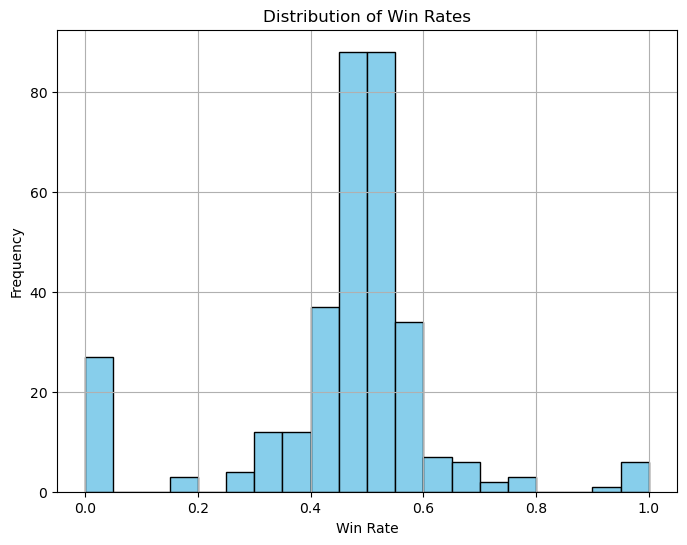

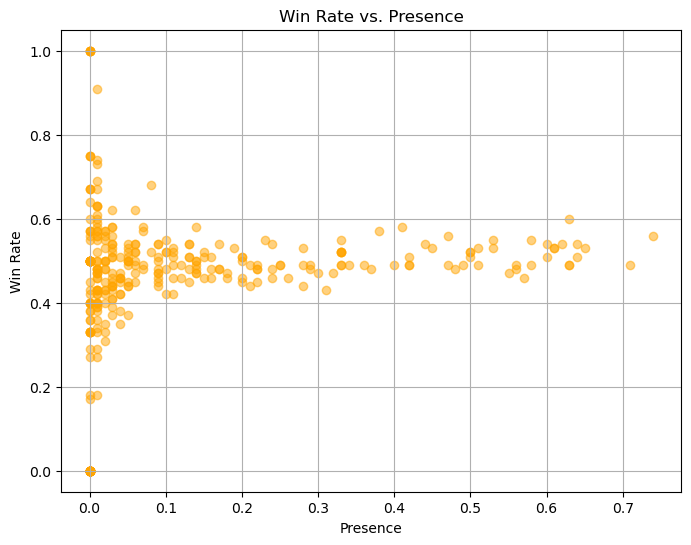

Champion with the highest win rate: Warwick
Champion with the most picks: Wukong


In [57]:
import pandas as pd
import matplotlib.pyplot as plt


summary_stats = data.describe()

plt.figure(figsize=(8, 6))
plt.hist(data['Winrate'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Win Rate')
plt.ylabel('Frequency')
plt.title('Distribution of Win Rates')
plt.grid(True)
plt.show()

plt.figure(figsize=(8, 6))
plt.scatter(data['Presence'], data['Winrate'], alpha=0.5, color='orange')
plt.xlabel('Presence')
plt.ylabel('Win Rate')
plt.title('Win Rate vs. Presence')
plt.grid(True)
plt.show()

top_win_champion = data[data['Winrate'] == data['Winrate'].max()]['Champion'].values[0]
print(f"Champion with the highest win rate: {top_win_champion}")

top_pick_champion = data[data['Picks'] == data['Picks'].max()]['Champion'].values[0]
print(f"Champion with the most picks: {top_pick_champion}")

We can see that winrate and presence follow a normal distribution. This is expected from a large set of data. 

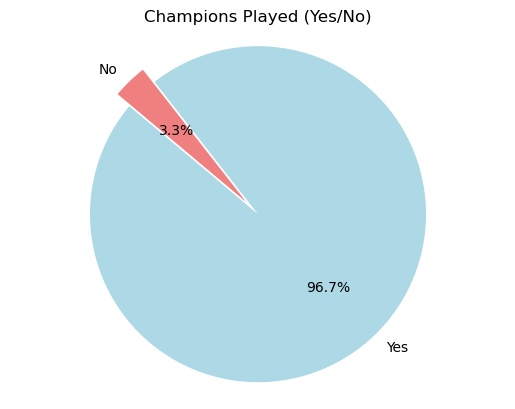

In [58]:

import pandas as pd
import numpy as np
#Creating a column that indicated a champion was played or not
data['Played'] = True
data.loc[data['Picks']>0,'Played']= "Yes"
data.loc[data['Picks']==0,'Played']= "No"

#Finding counts of Yes and No
dataCounts = data['Played'].value_counts()    

#Calculating percentages
totalResponses = len(data)
yesPercent = dataCounts["Yes"] / totalResponses
noPercent = dataCounts["No"] / totalResponses

# Create a pie chart
labels = ['Yes', 'No']
sizes = [yesPercent, noPercent]
colors = ['lightblue', 'lightcoral']
explode = (0.1, 0)  # explode the 'Yes' slice slightly

plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Champions Played (Yes/No)')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Show the pie chart
plt.show()

With League having over 160 champions it can be difficult to tune every single one to be suitable for high level play. This chart shows that nearly every champion is usable for pro play. What champions are played is highly dependent on the meta and the enemies team composition.  

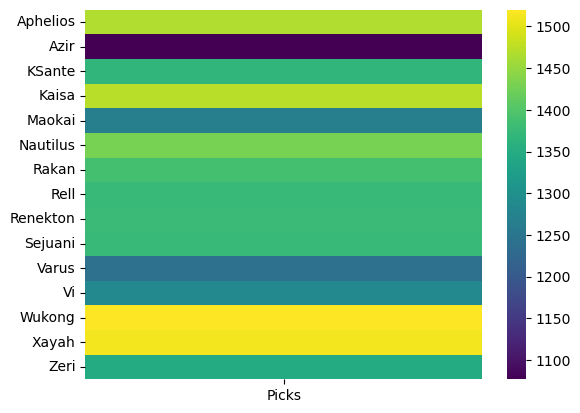

In [59]:
import seaborn as sns
import pandas as pd

# create variable for top 15 picked champions
top_picked = data.nlargest(17, 'Picks')

# Create a pivot table with champions as index and picks as values
pivot_table = top_picked.pivot_table(values='Picks', index='Champion')

# Plot the heatmap
ax = sns.heatmap(pivot_table, cmap='viridis')
ax.set_ylabel('')
plt.show()

A compliment chart to earlier with the champions with the highest W/L ratios. The champions with higher pick rates tend to have better winrates. 

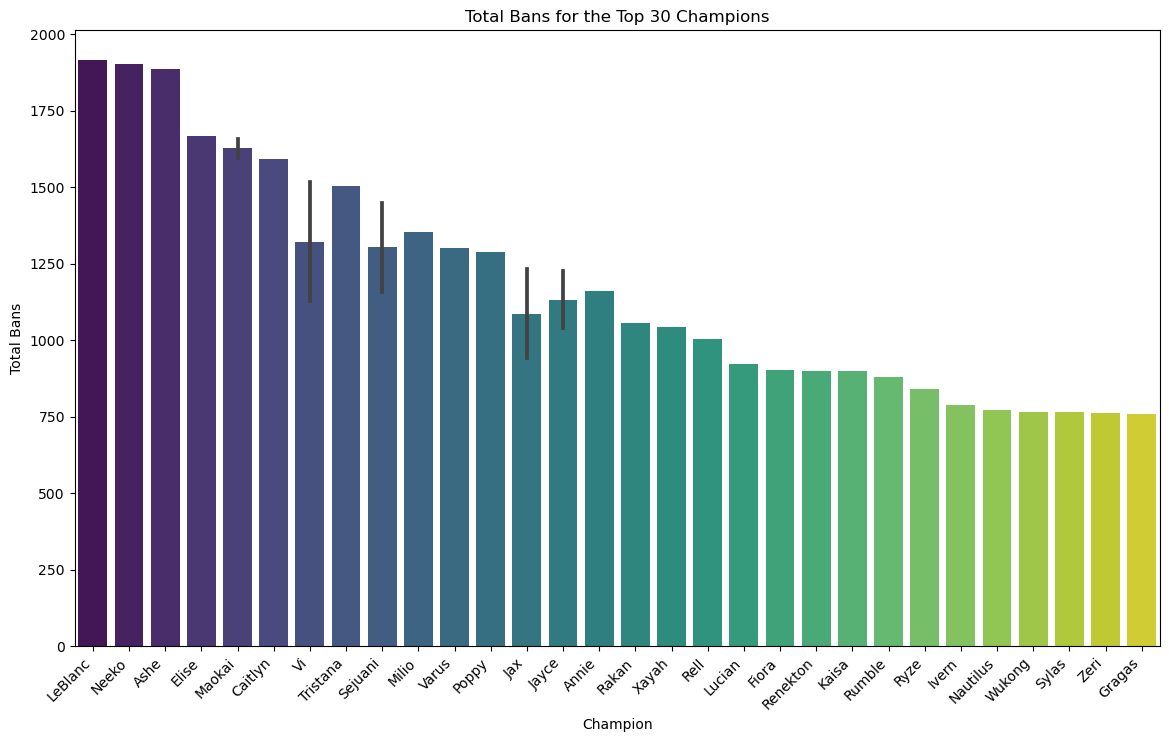

In [60]:
# Sort the DataFrame by 'Bans' in descending order
data_sorted = data.sort_values(by='Bans', ascending=False)

# Select the top 30 champions
top_30_champions = data_sorted.head(35)

# Example: Total Bans for the Top 30 Champions
plt.figure(figsize=(14, 8))
sns.barplot(data=top_30_champions, x='Champion', y='Bans', palette='viridis')
plt.title('Total Bans for the Top 30 Champions')
plt.xlabel('Champion')
plt.ylabel('Total Bans')
plt.xticks(rotation=45, ha='right')

plt.show()

We can see that many of the champions with high ban rates can be contributed by champions who provide a lot of utility to the team. Ashe, Maokai, Caitlyn, and Sejuani, are just a few examples of champions who provide ample utility for the team. So much utlility that, it make skew the favor to win to the side who picks these champions. To prevent such a risk, each team will ban these champions, so they can have a more fair chance of winning. 

### Conclusion

In our analysis of League of Legends competitive play data for Season 13 in 2023, we uncovered valuable insights into champion performance and its impact on the esports arena:

1. Champion Performance: We observed standout champions like Xayah, Rakan, and Sejuani, known for their competitive prowess.

2. Win-Loss Analysis: Certain champions, due to their frequent appearances, ranked high in both wins and losses, showcasing their strategic importance.

3. Win-Loss Ratios: Champions like Karma and Udyr struck a balance between victories and defeats, influenced by the ever-changing meta.

4. Presence vs. Win Rate: Warwick's impressive success rate and Wukong's popularity demonstrated the dynamic relationship between champion presence and performance.

5. Ban Strategies: Champions like Ashe, Maokai, Caitlyn, and Sejuani drew bans for their utility, highlighting the importance of strategic balance.

To wrap up, our analysis has shed light on the multifaceted world of competitive League of Legends. These insights provide a deeper understanding of champion dynamics, strategies, and the evolving meta within the thrilling realm of esports. With these data-driven insights, you now possess a valuable compass to navigate the intricate landscape of champions, strategies, and the ever-evolving meta that defines the dynamic world of esports.